# Titanic competition

<a id="table_of_contents"></a>
## Table of contents

* [Titanic competition](#)
    * [Project overview](#project_description)
        * [Short story](#)
        * [Goal](#)
        * [Data description](#)
    * [Introduce with data](#introduce)
        * [Import libs](#import_libs)
        * [Import data](#import_data)
    * [Data preparetion](#data_preparation)

## Project overview

<a id="introduce"></a>
## Introduce with data

<a id="import_libs"></a>
### Import libs

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import RandomState

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="import_data"></a>
### Import data

In [19]:
datasets_dir = '../datasets/titanic'

if not os.path.isdir(datasets_dir):
    datasets_dir = '/kaggle/input'
    
for dirname, _, filenames in os.walk(datasets_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../datasets/titanic/test.csv
../datasets/titanic/train.csv
../datasets/titanic/gender_submission.csv


#### Train dataset

In [47]:
# upload train dataset
df_train = pd.read_csv(os.path.join(datasets_dir, 'train.csv'))

# check shape of the dataset
print('Shape of the train dataset:', df_train.shape, end='\n\n')

# watch first 5 rows
print('First five rows of the train dataset:')
display(df_train.head())

Shape of the train dataset: (891, 12)

First five rows of the train dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# train dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<!-- Train dataset have 891 rows. Most missing data in Cabin column. -->

#### Test dataset

In [48]:
# upload gender test dataset
df_test = pd.read_csv(os.path.join(datasets_dir, 'test.csv'))

# check shape of the dataset
print('Shape of the test dataset:', df_test.shape, end='\n\n')

# watch first 5 rows in it
print('First five rows in the test dataset:')
display(df_test.head())

Shape of the test dataset: (418, 11)

First five rows in the test dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
# test dataset info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Gender submission

In [49]:
# upload gender submission dataset
df_gender = pd.read_csv(os.path.join(datasets_dir, 'gender_submission.csv'))

# check shape of the dataset
print('Shape of the gender_submission dataset:', df_gender.shape, end='\n\n')

# watch first 5 rows in it
print('First five rows in the gender submission dataset:')
display(df_gender.head())

Shape of the gender_submission dataset: (418, 2)

First five rows in the gender submission dataset:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<a id="data_preparation"></a>
## Data preparation
[to Table of contents](#table_of_contents)

### Duplicated
Let's check are there duplicates or not?

In [50]:
print(df_train.duplicated().sum())

0


### Target feature

AxesSubplot(0.125,0.125;0.775x0.755) Figure(576x432)
Int64Index([0, 1], dtype='int64')


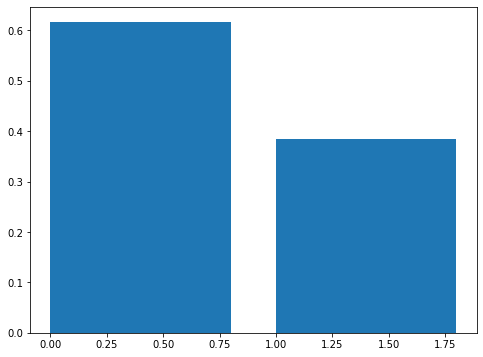

In [73]:

i, ax = plt.subplots(figsize=(8,6))
print(ax, i)
class_frequency = df_train['Survived'].value_counts(normalize=True)
print(class_frequency.index)
ax.bar(class_frequency.index, class_frequency.values, align='edge')
# ax.bar(df_train['Survived'], bins=2)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

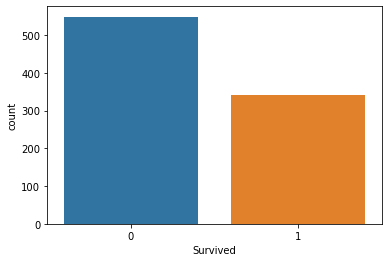

In [95]:
sns.countplot(x='Survived', data=df_train)

Survived
0    549
1    342
Name: Name, dtype: int64


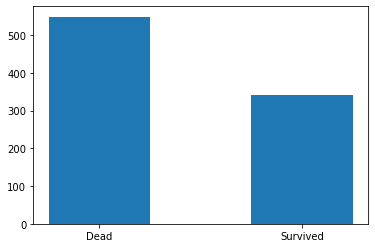

In [108]:
fig, ax = plt.subplots()
species = ('Dead', 'Survived')

width = 0.5
df = df_train.pivot_table(index='Survived', aggfunc='count')['Name']
print(df)
ax.bar(species, df, width)
plt.show()

### Categorial features

In [51]:
display(df_train.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Sex

In [83]:
df = df_train.pivot_table(index='Survived', columns='Sex', values='PassengerId', aggfunc='count')
df.head()

Sex,female,male
Survived,,
0,81,468
1,233,109


sex: female
sex: male


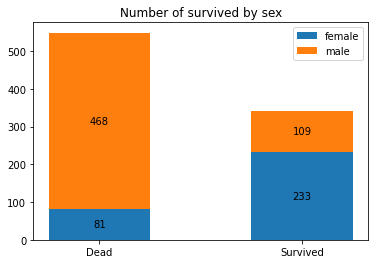

In [91]:
species = ('Dead', 'Survived')
width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(2)

for sex, sex_count in df.items():
    print('sex:',sex)
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of survived by sex')
ax.legend()

plt.show()

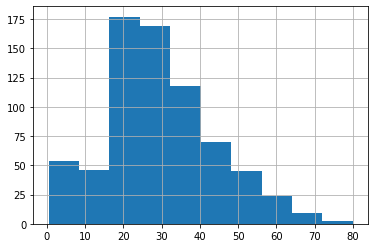

In [52]:
df_train['Age'].hist()
plt.show()

<AxesSubplot:>

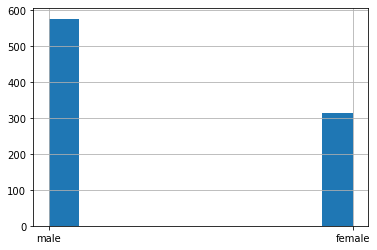

In [26]:
df_train['Sex'].hist()

In [30]:
df_train['Ticket'].duplicated().sum()

210

In [40]:
df_train.pivot_table(index='Ticket', aggfunc='count').head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
Ticket,,,,,,,,,,,
110152,3,3,3,3,3,3,3,3,3,3,3
110413,3,3,3,3,3,3,3,3,3,3,3
110465,1,2,2,2,2,2,2,2,2,2,2
110564,1,1,1,1,1,1,1,1,1,1,1
110813,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

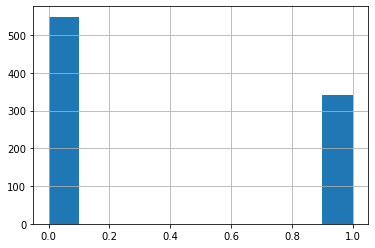

In [41]:
df_train['Survived'].hist()

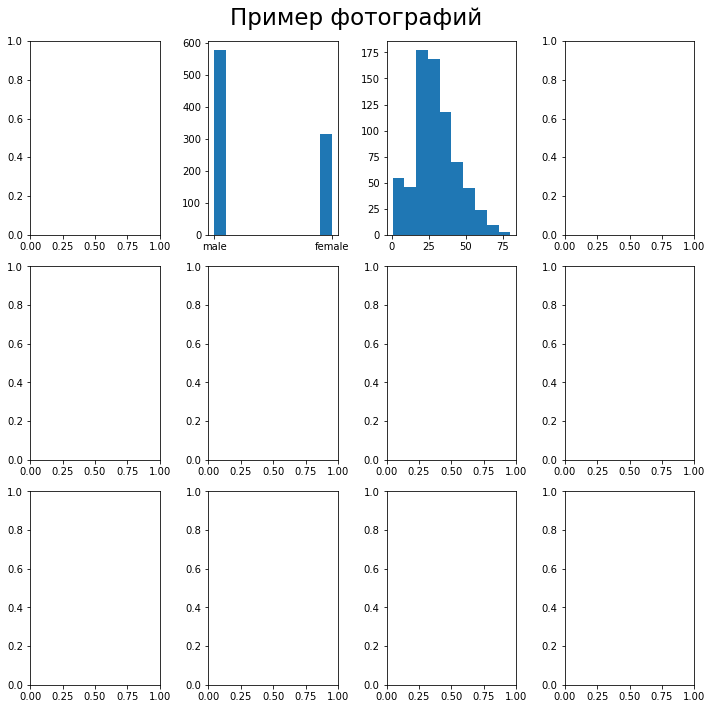

In [58]:
# создадим фигуру
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

# Переведем axis в одномерный массив и впишем картинки и возраст
# for i, ax in enumerate(axes.flat):
#     ax.hist(df_train['Age'])
#     ax.set_title('aaaaa')
#     ax.axis('off')
    
ax1 = axes.flat[1]
ax1.hist(df_train['Sex'])

ax2 = axes.flat[2]
ax2.hist(df_train['Age'])
# Зададим общий заголовок
fig.suptitle('Пример фотографий', fontsize=23)

# Напечатаем фоточки
plt.tight_layout()
plt.show()

